In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
df_simple_tag = pd.read_csv('../data/training_data_simple_tag.csv')
df_simple_reference = pd.read_csv('../data/training_data_simple_reference.csv')
df_simple_crypto = pd.read_csv('../data/training_data_simple_crypto.csv')
df_simple_reference_iddpg = pd.read_csv('../data/training_data_simple_reference_iddpg.csv')

In [3]:
df_simple_tag.head()

,iteration,lr,train_batch_size,gamma,n_optimiser_steps,max_grad_norm,episode_reward_mean_adversary,episode_reward_mean_agent
0,0,0.00001,128,0.99,100,1.0,7.0,-7.0
1,1,0.00001,128,0.99,100,1.0,1.0,-1.0
2,2,0.00001,128,0.99,100,1.0,46.0,-46.0
3,3,0.00001,128,0.99,100,1.0,202.0,-202.0
4,4,0.00001,128,0.99,100,1.0,1.0,-1.0


In [4]:
df_simple_reference.head()

,iteration,lr,train_batch_size,gamma,n_optimiser_steps,max_grad_norm,episode_reward_mean_agents
0,0,0.00001,10,0.99,100,1.0,-203.774765
1,1,0.00001,10,0.99,100,1.0,-199.758026
2,2,0.00001,10,0.99,100,1.0,-264.652893
3,3,0.00001,10,0.99,100,1.0,-281.747101
4,4,0.00001,10,0.99,100,1.0,-311.593201


In [ ]:
df_simple_reference_iddpg.head()

,iteration,lr,train_batch_size,gamma,n_optimiser_steps,max_grad_norm,episode_reward_mean_agents
0,0,0.00001,10,0.99,100,1.0,-231.936005
1,1,0.00001,10,0.99,100,1.0,-244.498688
2,2,0.00001,10,0.99,100,1.0,-280.064850
3,3,0.00001,10,0.99,100,1.0,-375.338165
4,4,0.00001,10,0.99,100,1.0,-443.447327


In [6]:
df_simple_crypto.head()

,iteration,lr,train_batch_size,gamma,n_optimiser_steps,max_grad_norm,episode_reward_mean_eve,episode_reward_mean_bob,episode_reward_mean_alice
0,0,0.00001,10,0.99,100,1.0,-177.394928,5.616959,5.616959
1,1,0.00001,10,0.99,100,1.0,-156.222626,-4.082033,-4.082033
2,2,0.00001,10,0.99,100,1.0,-156.683899,-3.731676,-3.731676
3,3,0.00001,10,0.99,100,1.0,-131.066467,-18.625031,-18.625031
4,4,0.00001,10,0.99,100,1.0,-121.291733,-20.719635,-20.719635


## Symple Tag Parameters Analysis

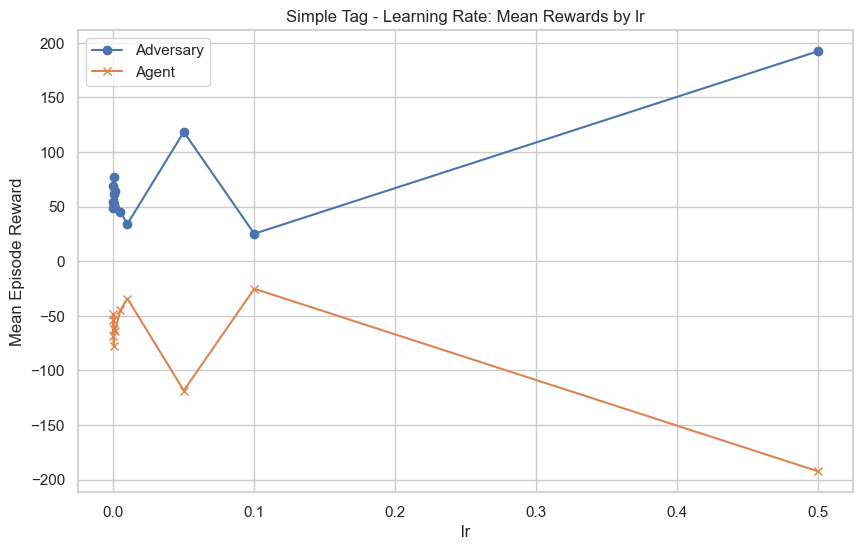

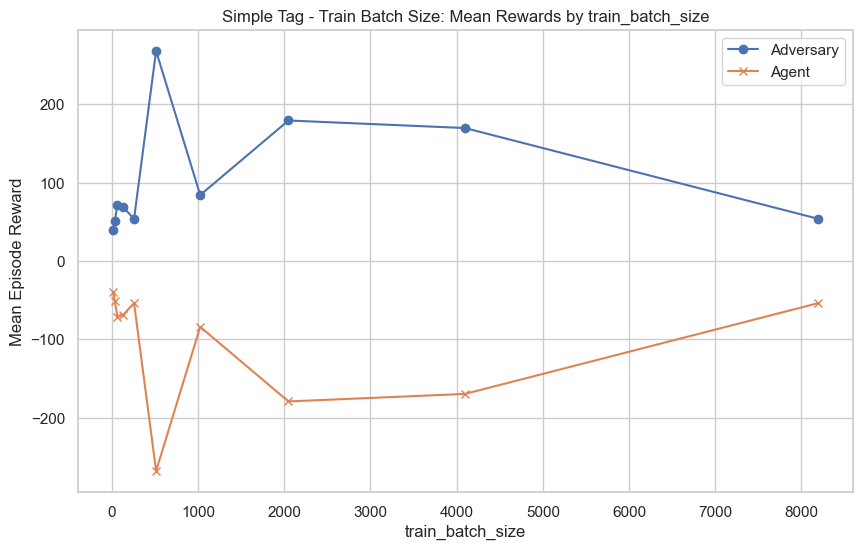

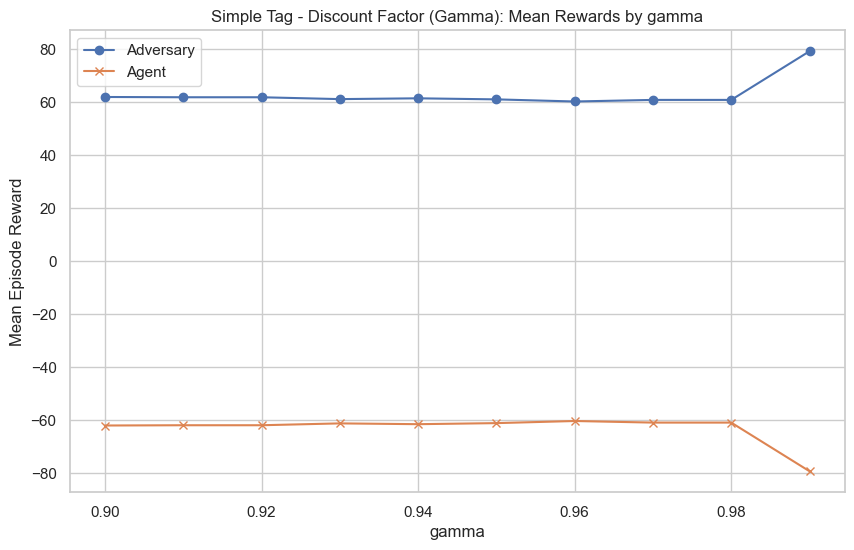

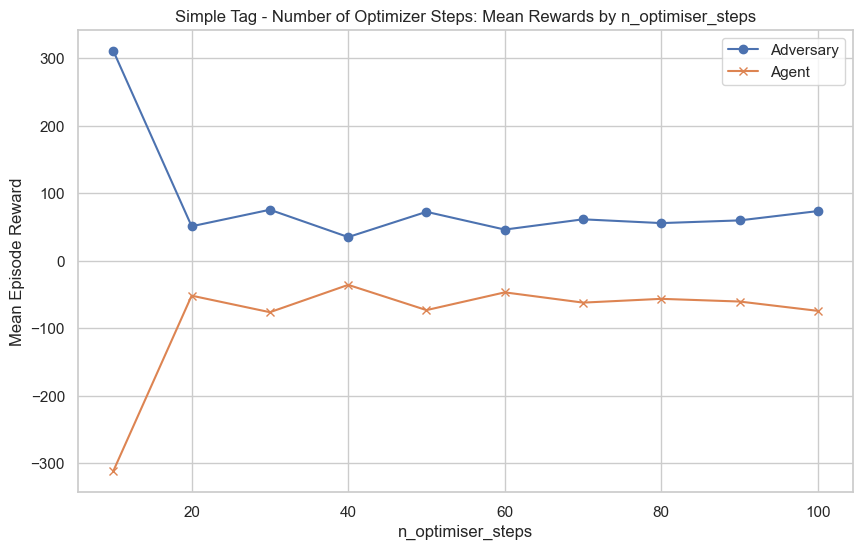

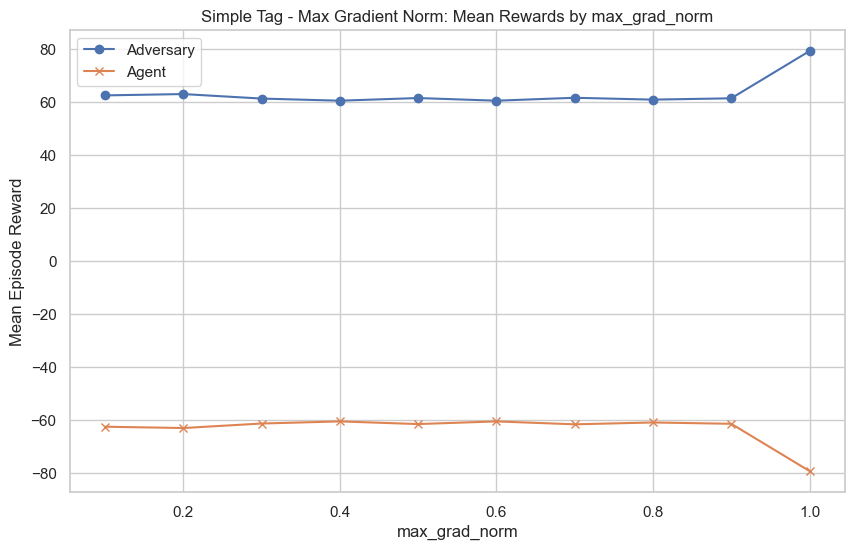

In [15]:
# Function to plot mean rewards for a parameter, comparing two groups
def plot_rewards_by_param_combined(data, param, reward_column1, label1, reward_column2, label2, title):
    grouped1 = data.groupby(param)[reward_column1].mean().reset_index()
    grouped2 = data.groupby(param)[reward_column2].mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    plt.plot(grouped1[param], grouped1[reward_column1], label=label1, marker="o")
    plt.plot(grouped2[param], grouped2[reward_column2], label=label2, marker="x")
    
    # Plot formatting
    plt.title(f"{title}: Mean Rewards by {param}")
    plt.xlabel(param)
    plt.ylabel("Mean Episode Reward")
    plt.legend()
    plt.grid(True)
    plt.show()

# List of parameters to plot
params_to_plot = [
    ('lr', 'Learning Rate'),
    ('train_batch_size', 'Train Batch Size'),
    ('gamma', 'Discount Factor (Gamma)'),
    ('n_optimiser_steps', 'Number of Optimizer Steps'),
    ('max_grad_norm', 'Max Gradient Norm')
]

# Loop through each parameter and generate plots
for param, param_name in params_to_plot:
    plot_rewards_by_param_combined(
        df_simple_tag, 
        param, 
        'episode_reward_mean_adversary', 
        'Adversary', 
        'episode_reward_mean_agent', 
        'Agent', 
        f"Simple Tag - {param_name}"
    )


---

## Simple Reference Parameters Analysis

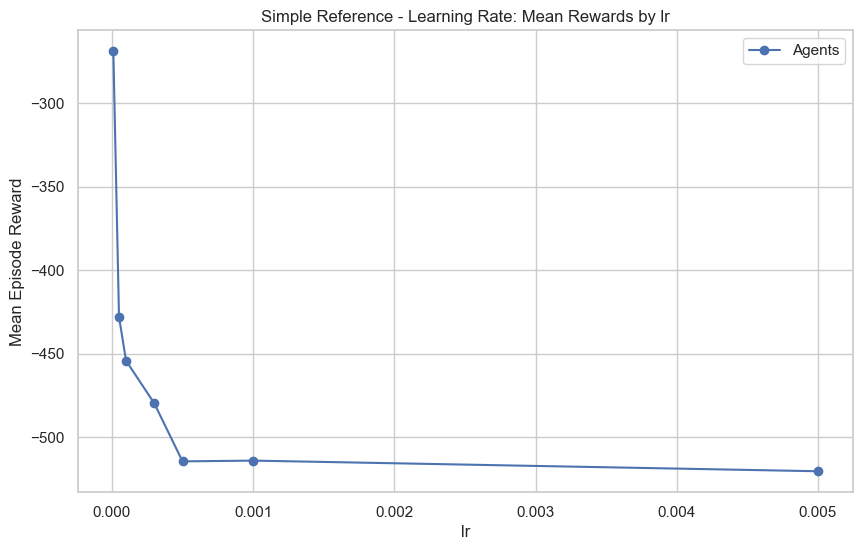

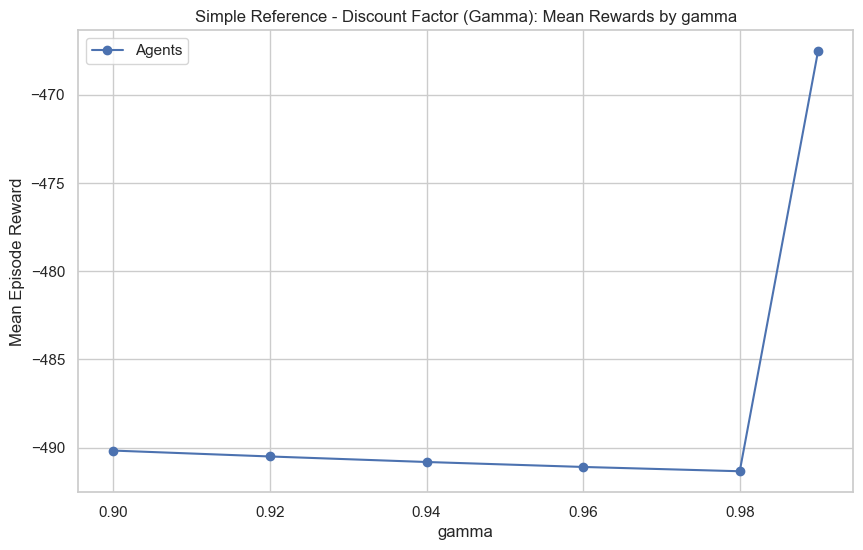

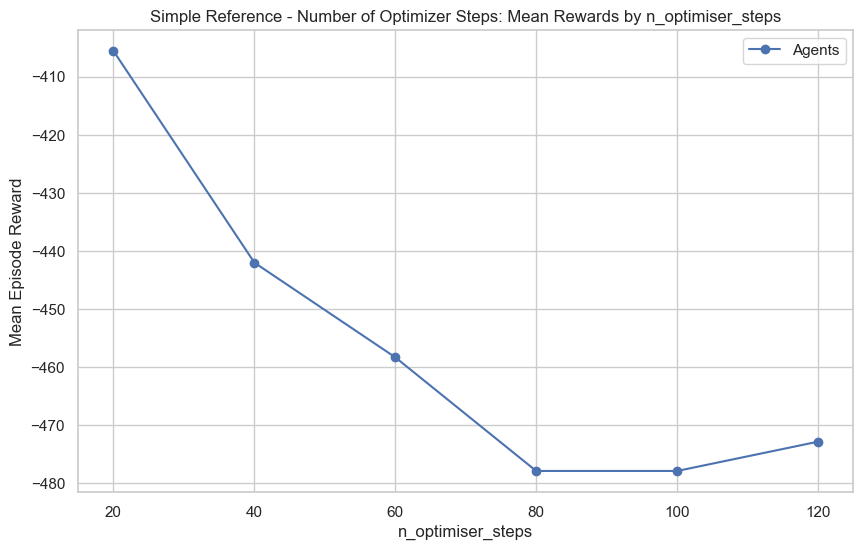

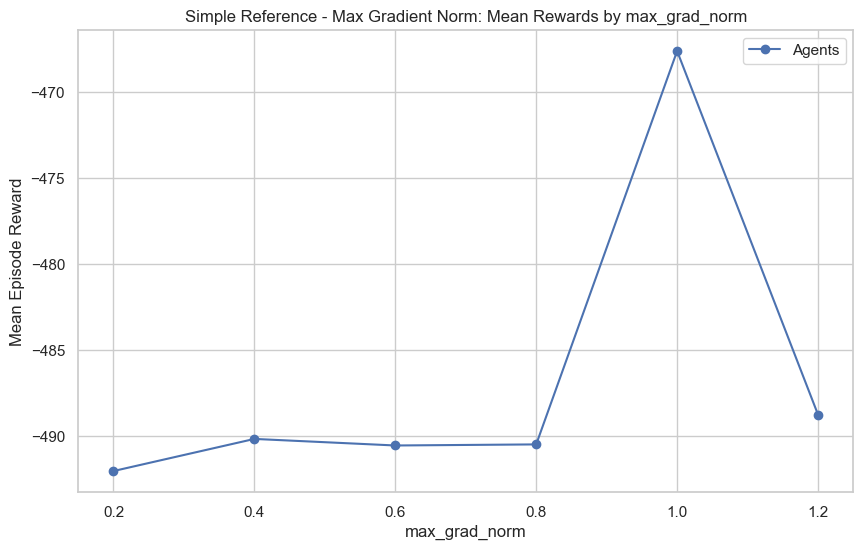

In [16]:
# Function to plot mean rewards for a parameter for Simple Reference
def plot_rewards_by_param_simple_reference(data, param, reward_column, title):
    grouped = data.groupby(param)[reward_column].mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    plt.plot(grouped[param], grouped[reward_column], marker="o", label="Agents")
    
    # Plot formatting
    plt.title(f"{title}: Mean Rewards by {param}")
    plt.xlabel(param)
    plt.ylabel("Mean Episode Reward")
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters to analyze for Simple Reference
params_to_plot_simple_reference = [
    ('lr', 'Learning Rate'),
    ('gamma', 'Discount Factor (Gamma)'),
    ('n_optimiser_steps', 'Number of Optimizer Steps'),
    ('max_grad_norm', 'Max Gradient Norm')
]

# Generate plots for Simple Reference
for param, param_name in params_to_plot_simple_reference:
    plot_rewards_by_param_simple_reference(
        df_simple_reference, 
        param, 
        'episode_reward_mean_agents', 
        f"Simple Reference - {param_name}"
    )


---

## Simple Crypto Parameters Analysis

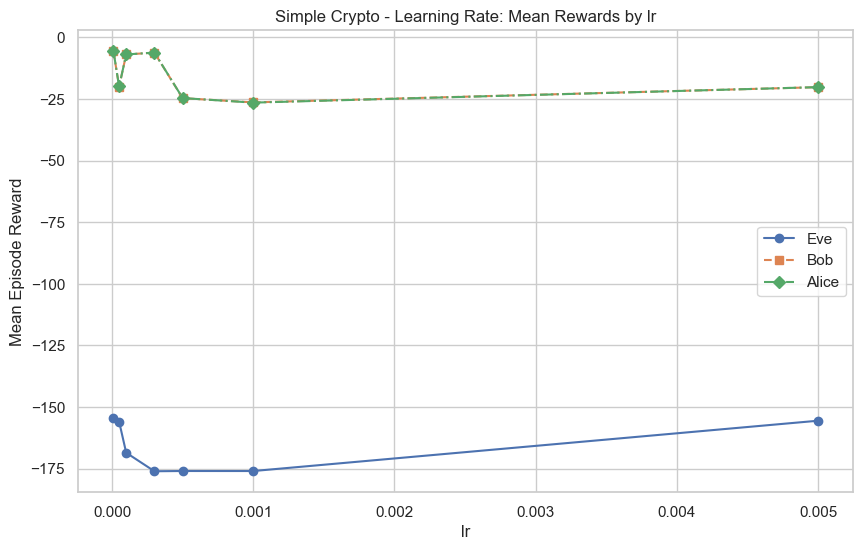

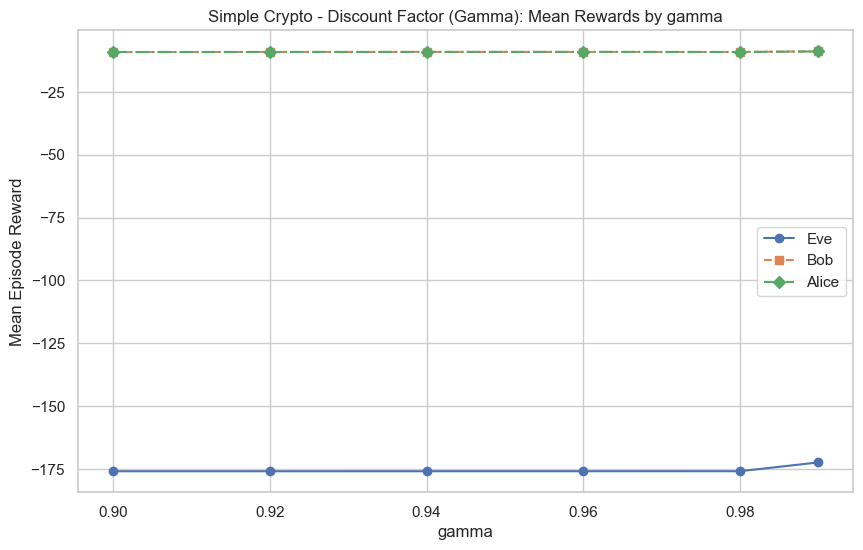

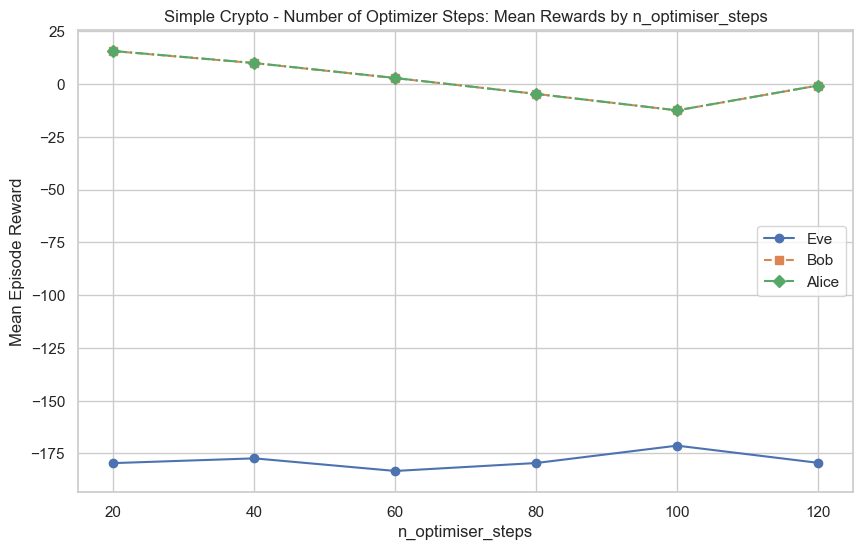

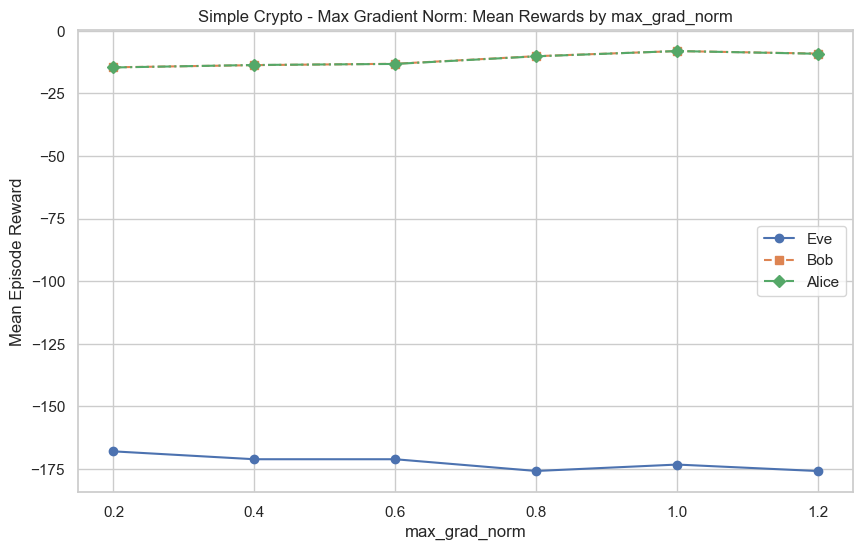

In [20]:
# Função para plotar com jitter
import numpy as np

def plot_rewards_by_param_simple_crypto_jitter(data, param, reward_columns, labels, title):
    plt.figure(figsize=(10, 6))
    
    # Estilos e marcadores
    line_styles = ['-', '--', '-.']
    markers = ['o', 's', 'D']
    
    for i, (reward_column, label) in enumerate(zip(reward_columns, labels)):
        grouped = data.groupby(param)[reward_column].mean().reset_index()
        
        # Adiciona jitter apenas para os valores no eixo y
        jitter = np.random.uniform(-0.1, 0.1, size=len(grouped[param]))
        y_values = grouped[reward_column] + jitter if label == "Bob" else grouped[reward_column]
        
        plt.plot(
            grouped[param], 
            y_values, 
            label=label, 
            linestyle=line_styles[i % len(line_styles)], 
            marker=markers[i % len(markers)]
        )
    
    # Configuração do gráfico
    plt.title(f"{title}: Mean Rewards by {param}")
    plt.xlabel(param)
    plt.ylabel("Mean Episode Reward")
    plt.legend()
    plt.grid(True)
    plt.show()

# Parâmetros e execução
params_to_plot_simple_crypto = [
    ('lr', 'Learning Rate'),
    ('gamma', 'Discount Factor (Gamma)'),
    ('n_optimiser_steps', 'Number of Optimizer Steps'),
    ('max_grad_norm', 'Max Gradient Norm')
]

reward_columns_simple_crypto = ['episode_reward_mean_eve', 'episode_reward_mean_bob', 'episode_reward_mean_alice']
labels_simple_crypto = ['Eve', 'Bob', 'Alice']

# Gera gráficos com jitter
for param, param_name in params_to_plot_simple_crypto:
    plot_rewards_by_param_simple_crypto_jitter(
        df_simple_crypto, 
        param, 
        reward_columns_simple_crypto, 
        labels_simple_crypto, 
        f"Simple Crypto - {param_name}"
    )


---

## MADDPG VS IDDPG

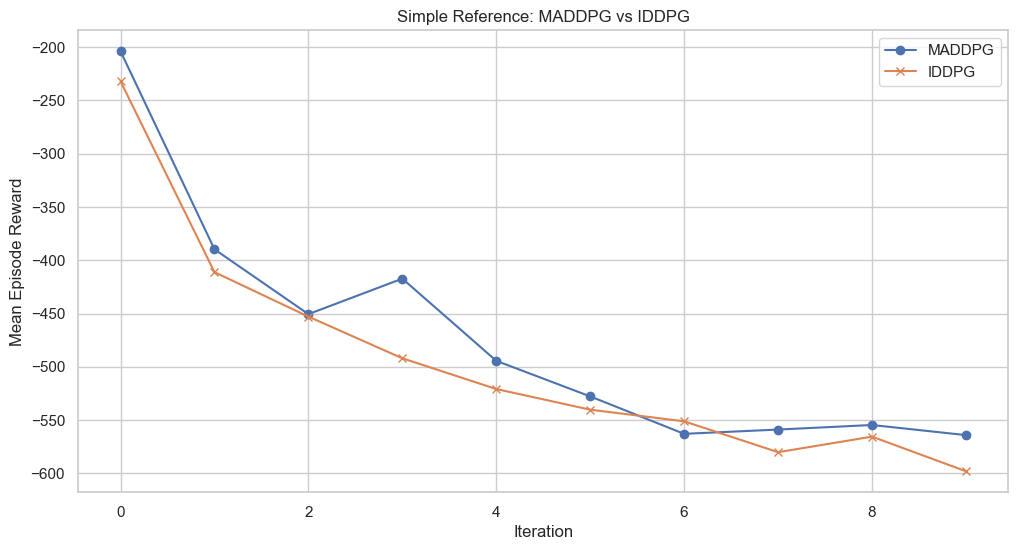

In [8]:
# Function to compare MADDPG and IDDPG
def compare_maddpg_iddpg(maddpg_data, iddpg_data, reward_column, title):
    plt.figure(figsize=(12, 6))
    
    # MADDPG
    maddpg_grouped = maddpg_data.groupby('iteration')[reward_column].mean()
    plt.plot(maddpg_grouped.index, maddpg_grouped.values, label="MADDPG", marker="o")
    
    # IDDPG
    iddpg_grouped = iddpg_data.groupby('iteration')[reward_column].mean()
    plt.plot(iddpg_grouped.index, iddpg_grouped.values, label="IDDPG", marker="x")
    
    plt.title(title)
    plt.xlabel("Iteration")
    plt.ylabel("Mean Episode Reward")
    plt.legend()
    plt.grid(True)
    plt.show()

# Compare agents' rewards
compare_maddpg_iddpg(df_simple_reference, df_simple_reference_iddpg, 'episode_reward_mean_agents', 'Simple Reference: MADDPG vs IDDPG')


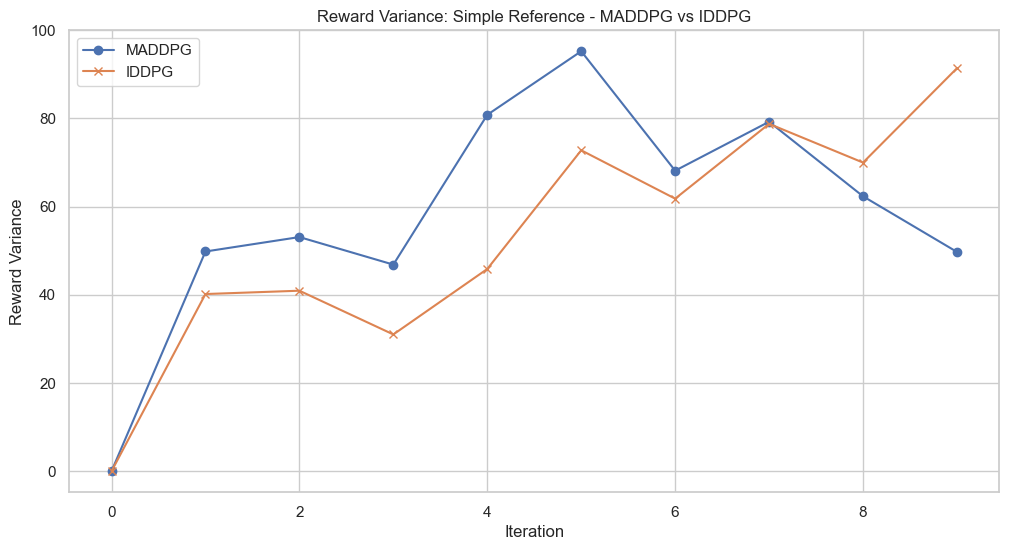

In [11]:
# Function to compare reward variance between MADDPG and IDDPG
def compare_reward_variance(maddpg_data, iddpg_data, reward_column, title):
    plt.figure(figsize=(12, 6))
    
    # MADDPG
    maddpg_variance = maddpg_data.groupby('iteration')[reward_column].std().reset_index()
    plt.plot(maddpg_variance['iteration'], maddpg_variance[reward_column], label="MADDPG", marker="o")
    
    # IDDPG
    iddpg_variance = iddpg_data.groupby('iteration')[reward_column].std().reset_index()
    plt.plot(iddpg_variance['iteration'], iddpg_variance[reward_column], label="IDDPG", marker="x")
    
    # Plot formatting
    plt.title(title)
    plt.xlabel("Iteration")
    plt.ylabel("Reward Variance")
    plt.legend()
    plt.grid(True)
    plt.show()

# Compare reward variance for Simple Reference
compare_reward_variance(
    df_simple_reference, 
    df_simple_reference_iddpg, 
    'episode_reward_mean_agents', 
    'Reward Variance: Simple Reference - MADDPG vs IDDPG'
)
